<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Luis F. Lopez Arnaud.

**Fecha:** XX de octubre del 202X.

**Expediente** : XXX.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: Link con el enlace del repositorio del creador del proyecto

# Tarea X: Clase X

## Enunciado de tarea (Transcibirlo)
> Descripción de la tarea

### Ejercicio 1: (enunciado) Transcribirlo

Código de solución estudiante 1

In [11]:
# Código de solución estudiante 1
.
.
.
.


SyntaxError: invalid syntax (3691168239.py, line 2)

Código de solución estudiante 2

In [12]:
import pandas as pd
from pywin.mfc.dialog import PrintDialog

file_path = 'Datasets/housing.csv'
df = pd.read_csv(file_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [13]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


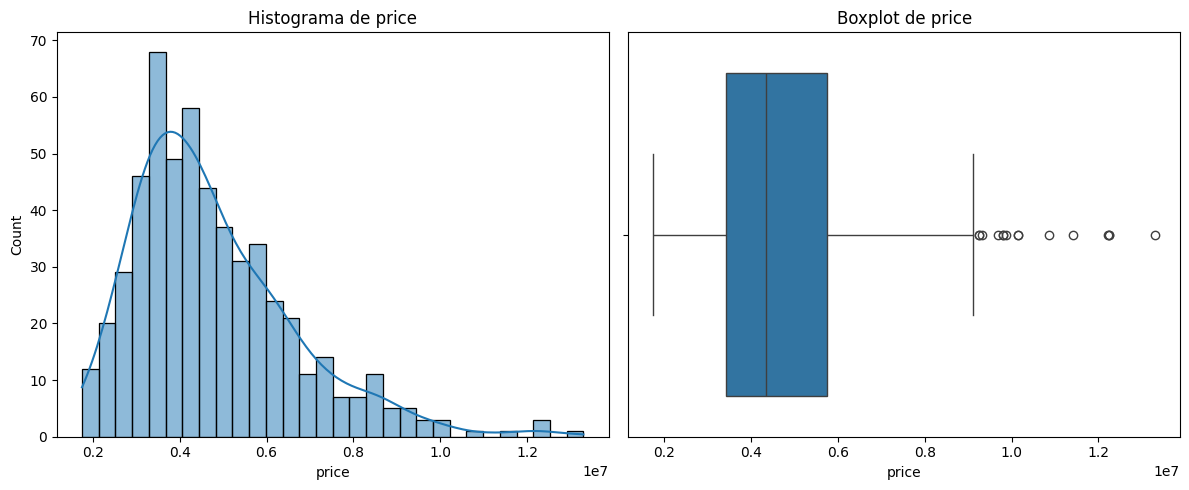

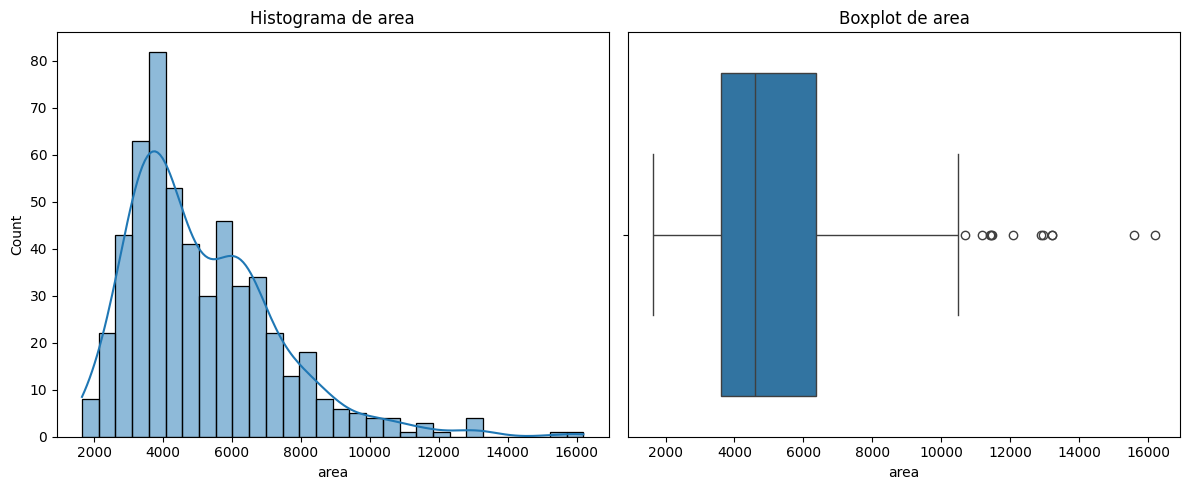

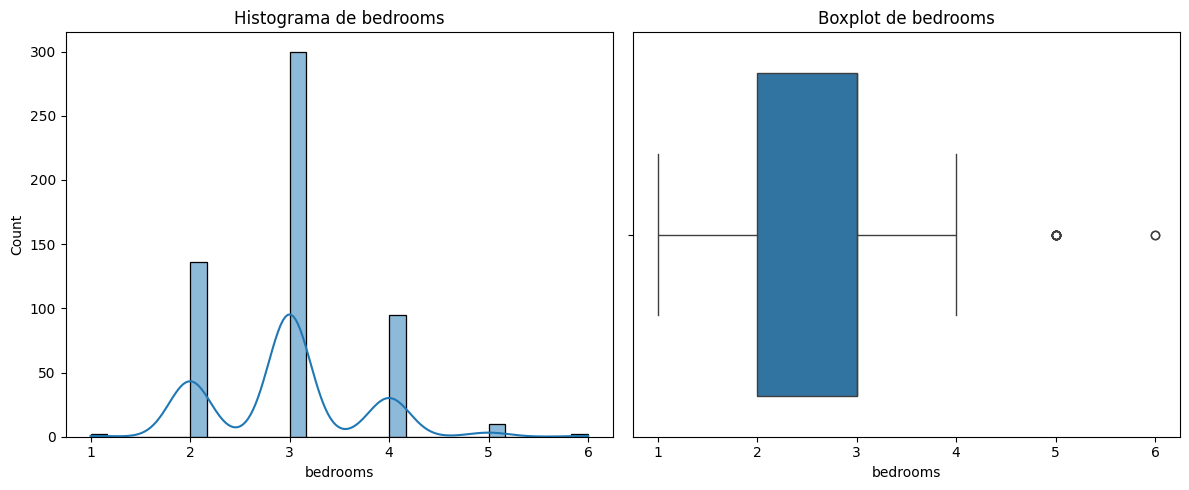

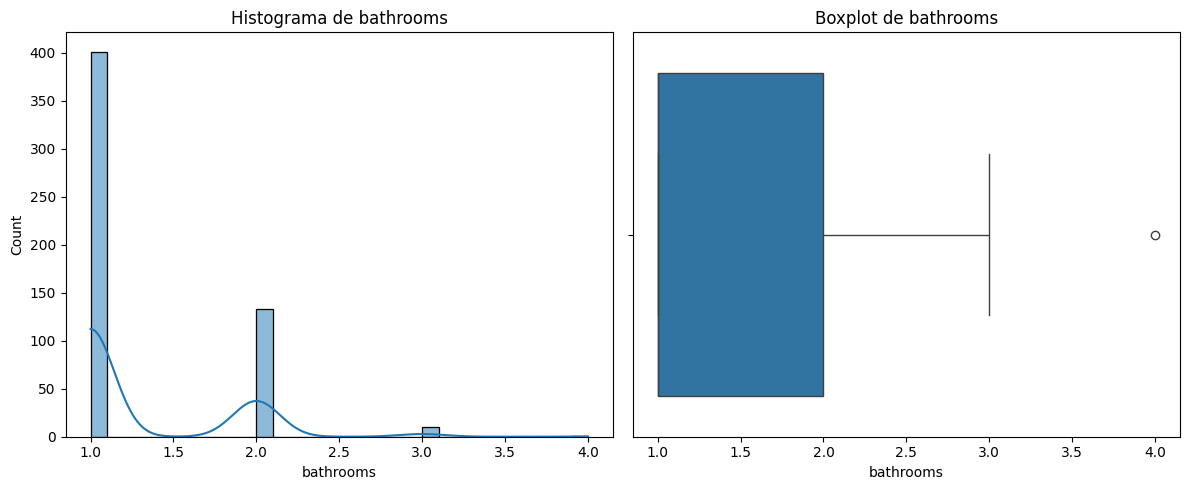

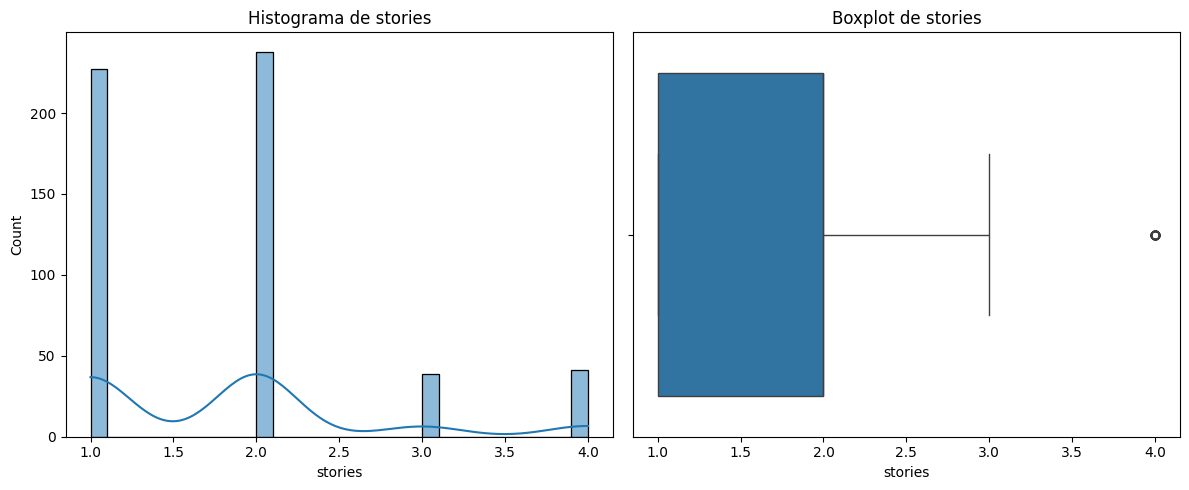

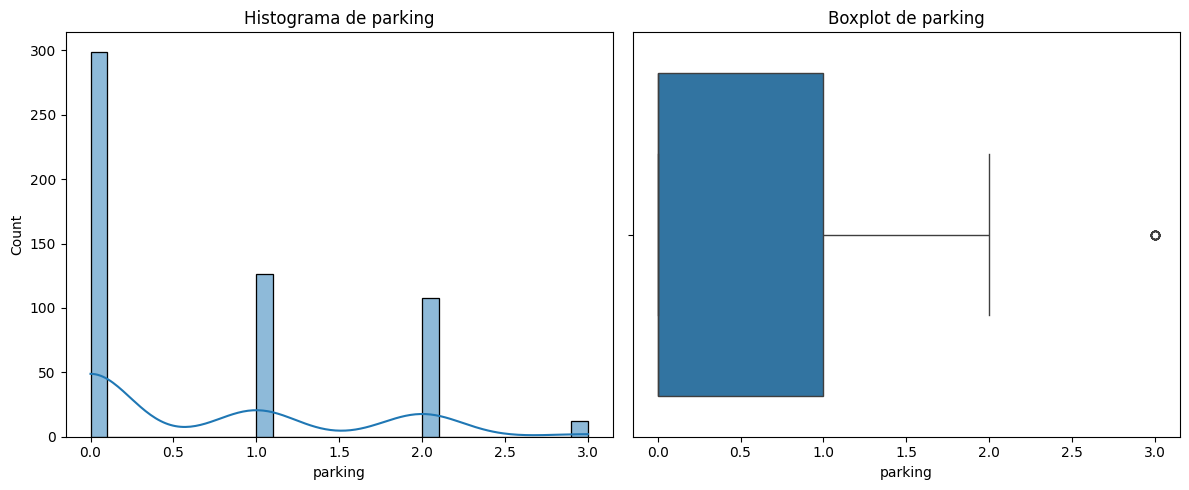

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def numg(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    for col in numeric_cols:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        sns.histplot(df[col], bins=30, kde=True, ax=axes[0])
        axes[0].set_title(f'Histograma de {col}')
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f'Boxplot de {col}')
        plt.tight_layout()
        plt.show()
numg(df)

In [15]:
def outlier_percentage(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    outlier_percentages = {}
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_percentages[col] = (outliers / len(df)) * 100
    
    return outlier_percentages

outlier_percentages = outlier_percentage(df)
outlier_percentages

{'price': 2.7522935779816518,
 'area': 2.2018348623853212,
 'bedrooms': 2.2018348623853212,
 'bathrooms': 0.1834862385321101,
 'stories': 7.522935779816514,
 'parking': 2.2018348623853212}

### ya que la proporcion de outliers es muy chica asi que los voy a dejar, aparte en este caso me parece que brindan informacion relevante

In [16]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
df = df.drop(categorical_columns, axis=1)
df = pd.concat([df, encoded_df], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,12250000,8960,4,4,4,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,12250000,9960,3,2,2,2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,12215000,7500,4,2,2,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,11410000,7420,4,1,2,2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


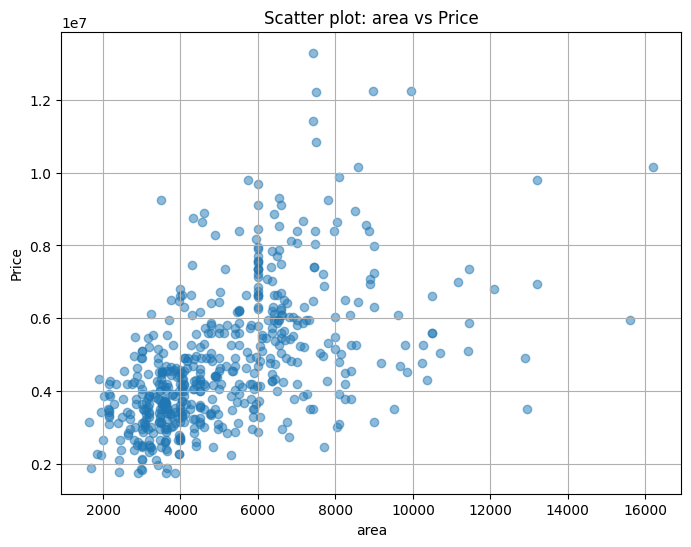

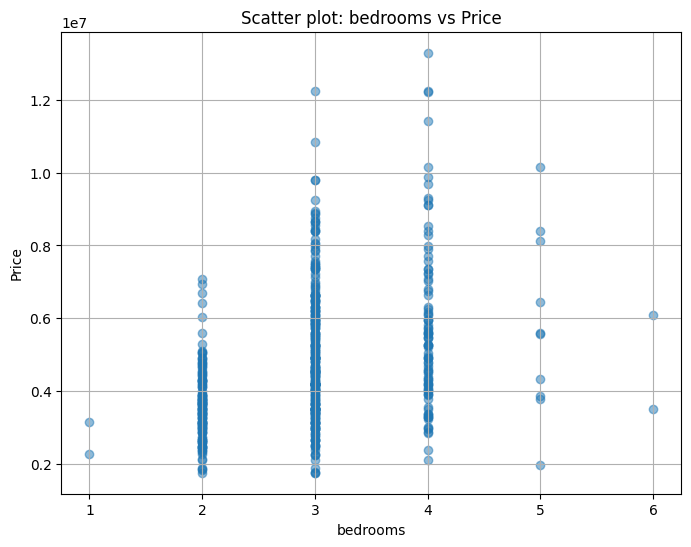

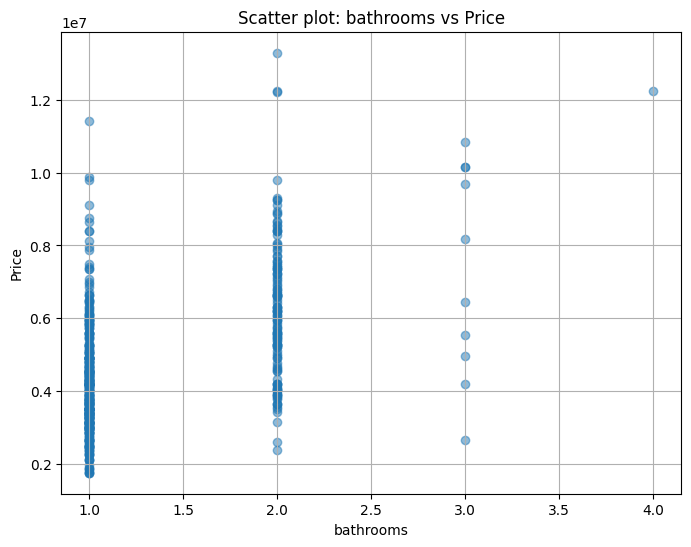

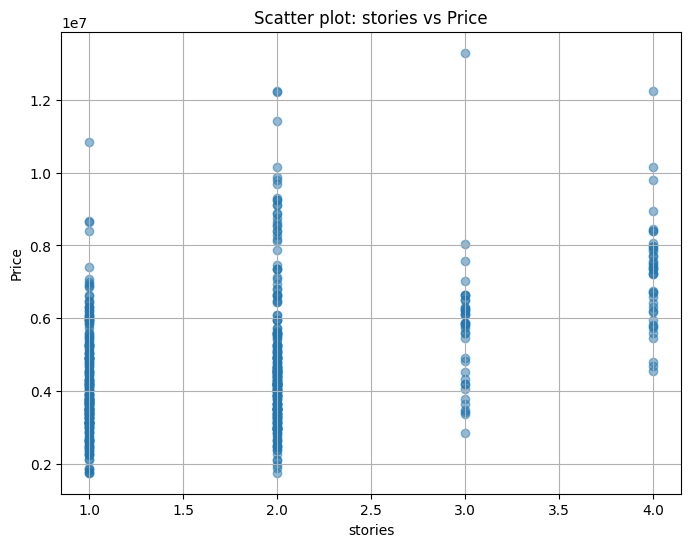

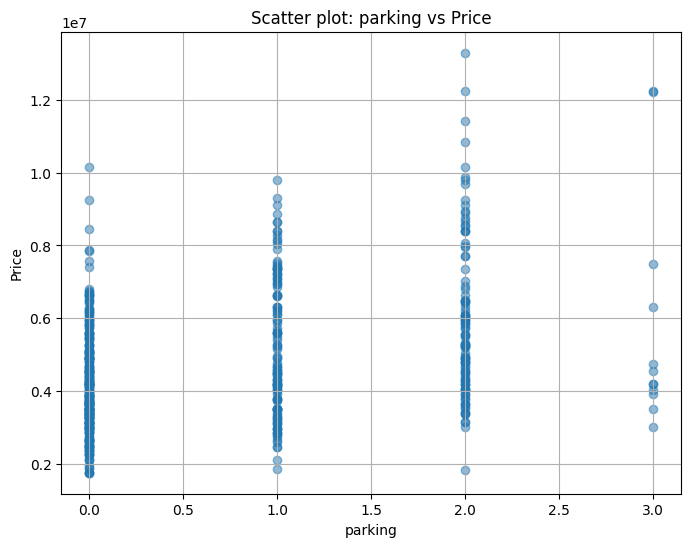

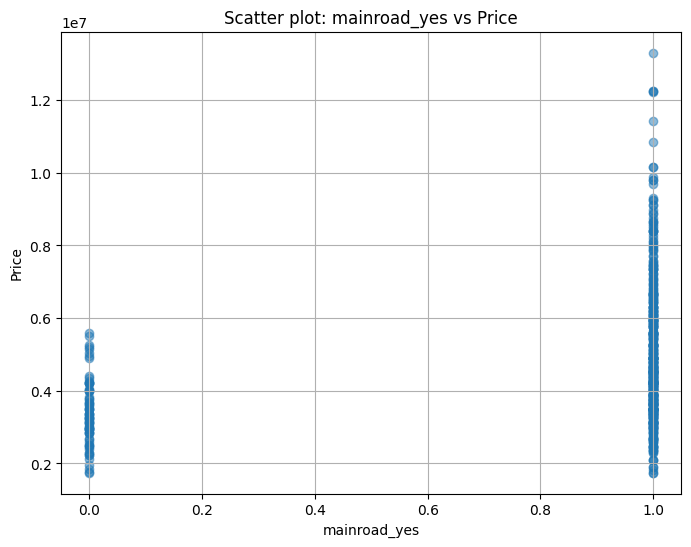

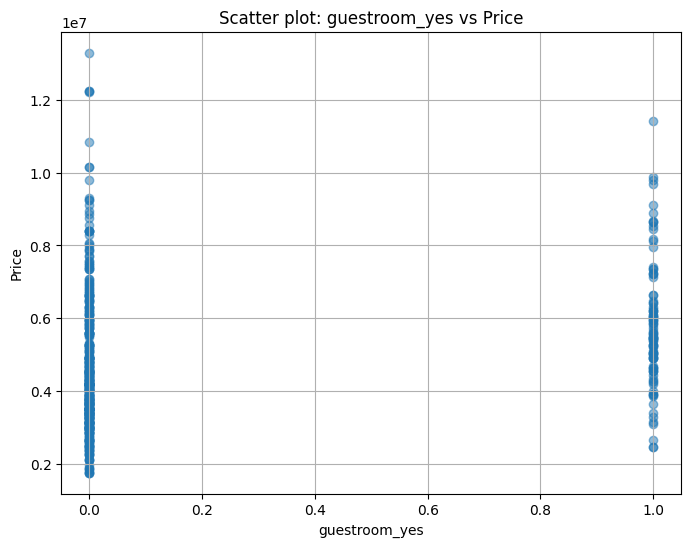

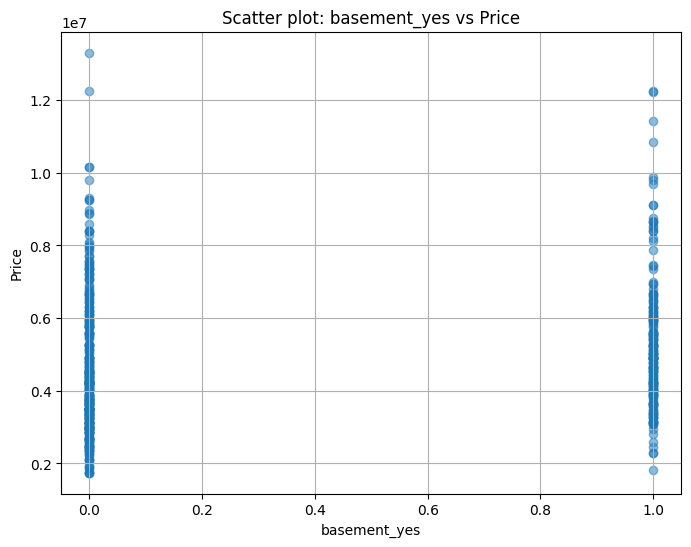

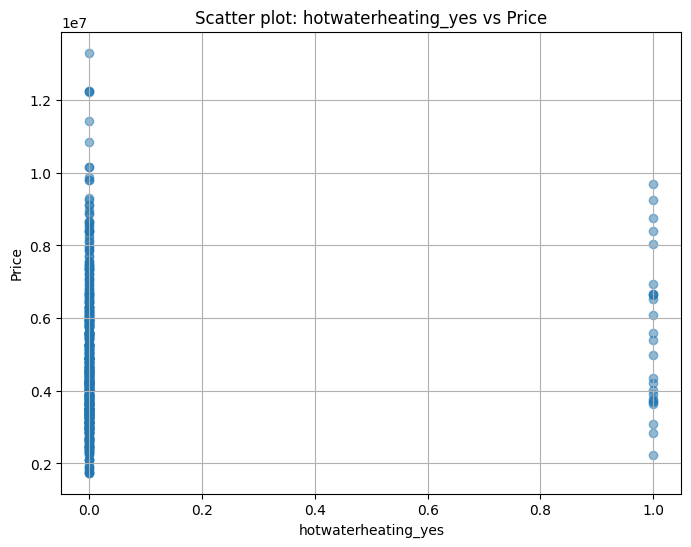

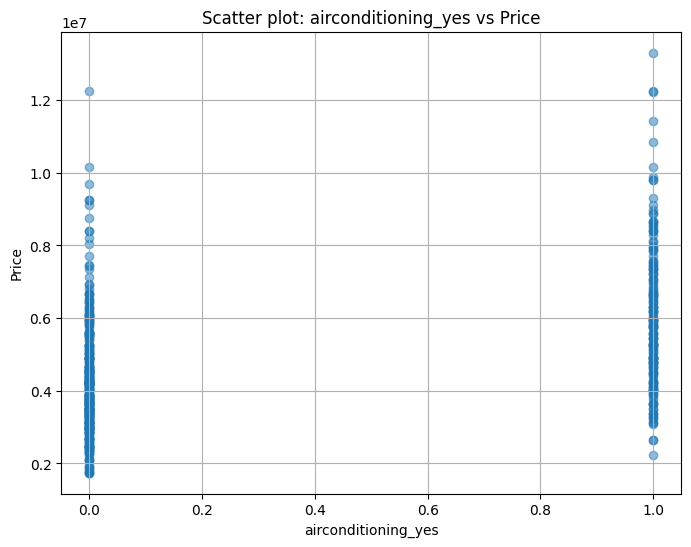

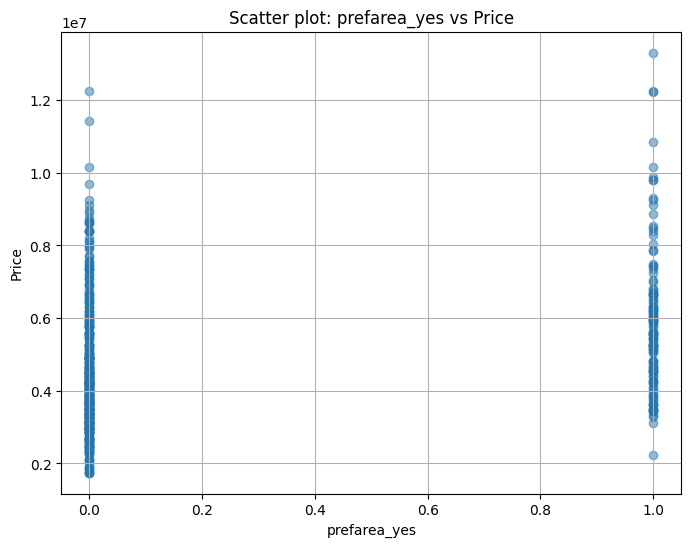

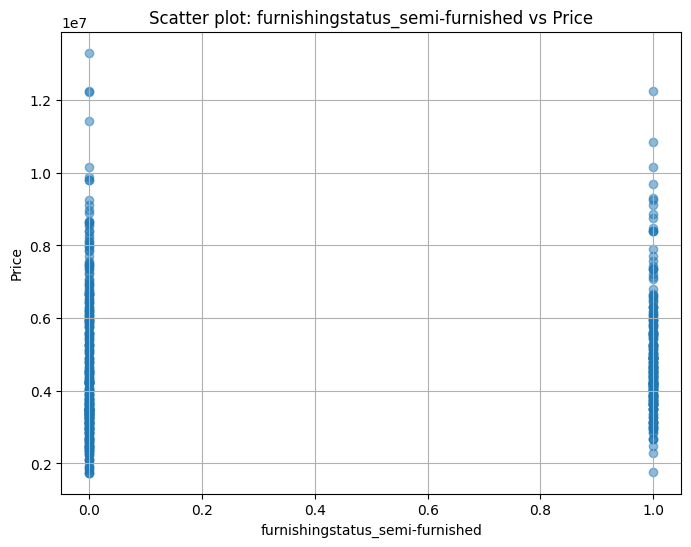

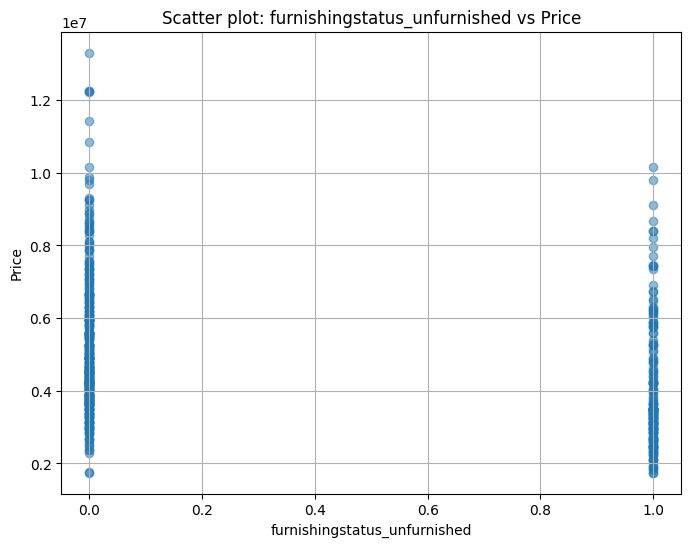

In [18]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('price')
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[column], df['price'], alpha=0.5)
    plt.title(f'Scatter plot: {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.grid(True)
    plt.show()

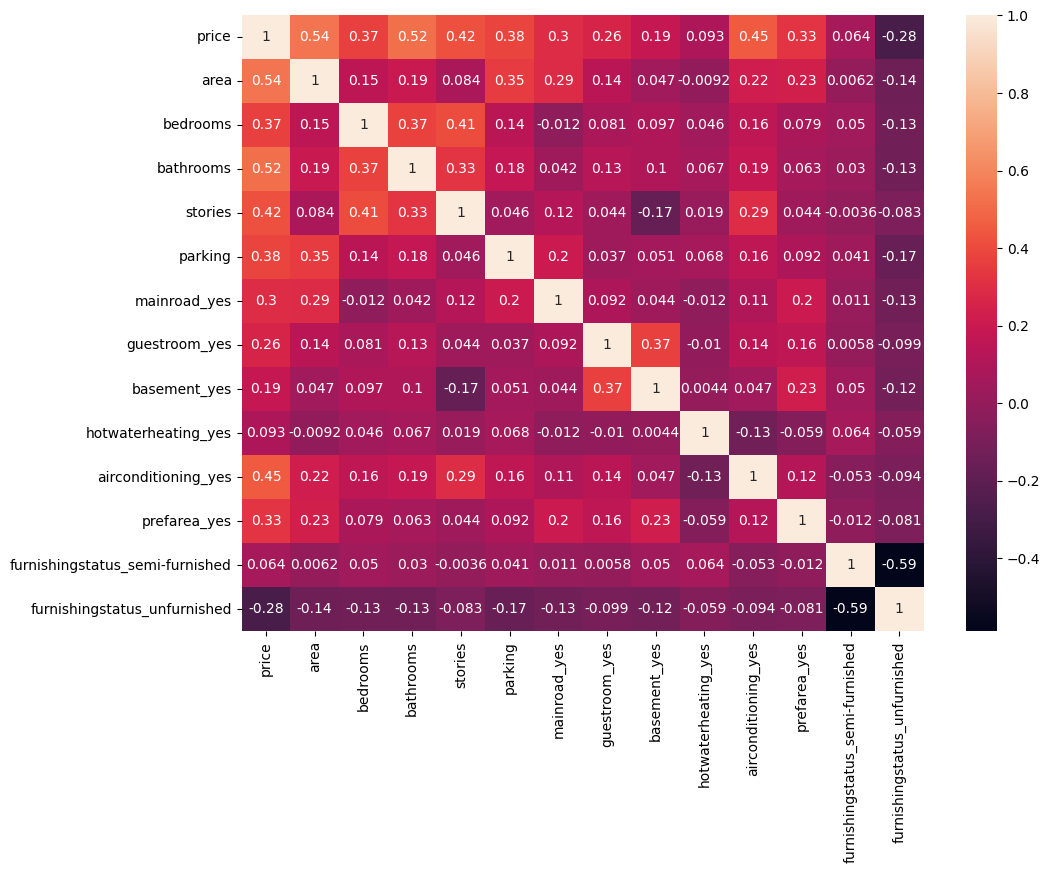

In [19]:
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, annot=True)
plt.show()

In [20]:
X = df[df.columns.drop("price")].values
y = df["price"].values

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_scaler = MinMaxScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1)).flatten()




In [70]:
n_feat = X_train.shape[1]
X_tr_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], n_feat, 1))
X_te_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], n_feat, 1))

Al aplicar .flatten() después de escalar las etiquetas con MinMaxScaler, se asegura que las etiquetas estén en el formato adecuado para ser utilizadas en el modelo sin problemas de dimensiones

In [187]:
model = Sequential([
    Input(shape=(n_feat, 1)),  # Capa de entrada
    
    # Primer bloque convolucional
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    # Segundo bloque convolucional
    Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.2),
    
    # Aplanar la salida para la capa densa
    Flatten(),
    
    # Capas densas
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='softmax'),
    Dropout(0.2),
    
    # Capa de salida
    Dense(1)
])

In [188]:
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=0.001), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [189]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=400,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0994 - val_loss: 0.0482 - learning_rate: 0.0010
Epoch 2/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0500 - val_loss: 0.0407 - learning_rate: 0.0010
Epoch 3/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0281 - val_loss: 0.0373 - learning_rate: 0.0010
Epoch 4/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0281 - val_loss: 0.0359 - learning_rate: 0.0010
Epoch 5/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - val_loss: 0.0350 - learning_rate: 0.0010
Epoch 6/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0260 - val_loss: 0.0342 - learning_rate: 0.0010
Epoch 7/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0234 - val_loss: 0.0332 - learning_rate: 0.0010
Epoch 8/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - val_loss: 0.0320 - learning_rate: 0.0010
Epoch 9/400
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - val_loss: 0.0305 - learning_rate: 0.0010
Epoch 10/400
13/13

In [190]:
loss = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
loss

0.019502177834510803

In [191]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)
y_test_actual = y_test.reshape(-1, 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [192]:
print(f"y_pred_scaled: min={y_pred_scaled.min()}, max={y_pred_scaled.max()}")
print(f"y_pred (convertido): min={y_pred.min()}, max={y_pred.max()}")
print(f"y_test_actual: min={y_test_actual.min()}, max={y_test_actual.max()}")

y_pred_scaled: min=0.13316793739795685, max=0.5860051512718201
y_pred (convertido): min=3148263.5, max=7903054.5
y_test_actual: min=1750000, max=13300000


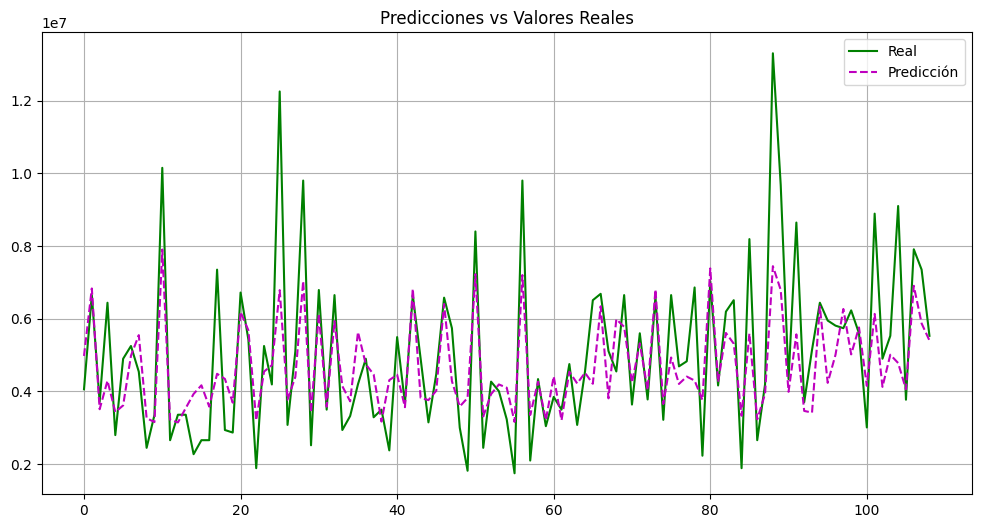

In [193]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, 'g-', label='Real')  
plt.plot(y_pred, 'm--', label='Predicción')  
plt.title('Predicciones vs Valores Reales')
plt.legend()
plt.grid(True)
plt.show()

In [194]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
mae = mean_absolute_error(y_test_actual, y_pred)
r2 = r2_score(y_test_actual, y_pred)

rmse
mae
r2



0.5746196508407593

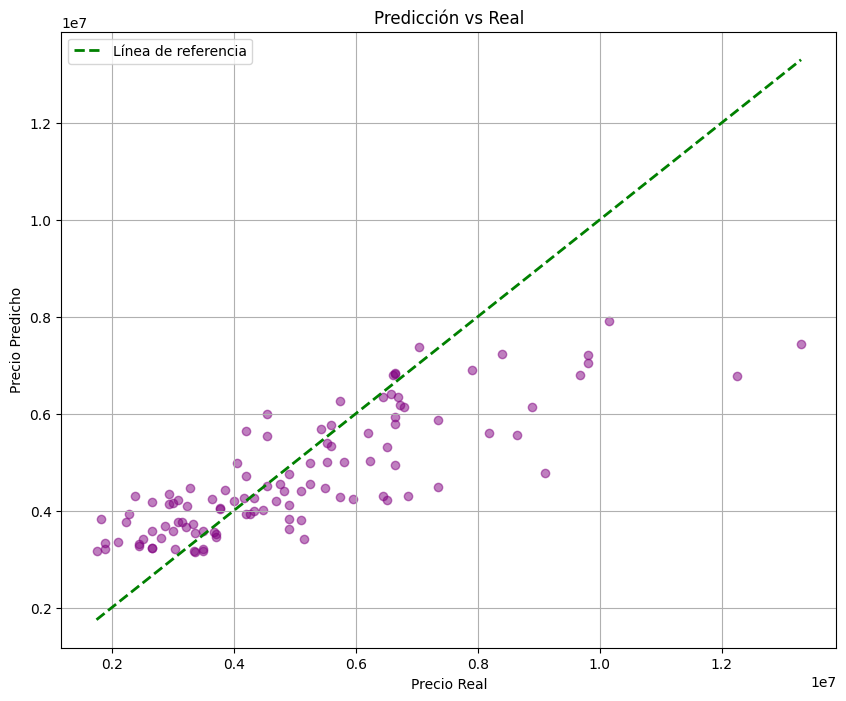

In [195]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test_actual, y_pred, alpha=0.5, color='purple') 
plt.plot([y_test_actual.min(), y_test_actual.max()],
         [y_test_actual.min(), y_test_actual.max()],
         'g--', lw=2, label='Línea de referencia')  
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicción vs Real')
plt.legend()
plt.grid(True)
plt.show()

Acabe la red usando activacion Softmax para hacer que las salidas de la red sean mejores, ya que convierte las activaciones en probabilidades.

In [196]:
file_path = 'Datasets/PRICE_AND_DEMAND_201801_NSW1.csv'
df = pd.read_csv(file_path)

In [197]:
df

,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,NSW1,2018/01/01 00:30:00,6912.25,91.86,TRADE
1,NSW1,2018/01/01 01:00:00,6745.63,88.83,TRADE
2,NSW1,2018/01/01 01:30:00,6466.06,73.62,TRADE
3,NSW1,2018/01/01 02:00:00,6279.80,71.49,TRADE
4,NSW1,2018/01/01 02:30:00,6177.31,69.27,TRADE
...,...,...,...,...,...
1483,NSW1,2018/01/31 22:00:00,7352.80,56.73,TRADE
1484,NSW1,2018/01/31 22:30:00,7370.29,60.88,TRADE
1485,NSW1,2018/01/31 23:00:00,7227.34,58.69,TRADE
1486,NSW1,2018/01/31 23:30:00,7055.73,60.24,TRADE


In [198]:
df.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
RRP               float64
PERIODTYPE         object
dtype: object

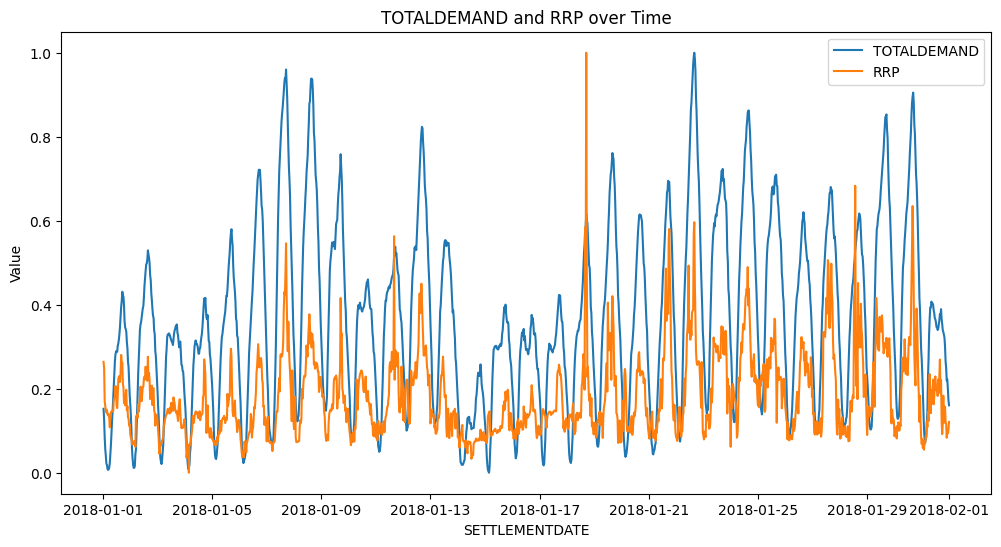

In [213]:
df['SETTLEMENTDATE'] = pd.to_datetime(df['SETTLEMENTDATE'])

plt.figure(figsize=(12, 6))
plt.plot(df['SETTLEMENTDATE'], df['TOTALDEMAND'], label='TOTALDEMAND')
plt.plot(df['SETTLEMENTDATE'], df['RRP'], label='RRP')
plt.xlabel('SETTLEMENTDATE')
plt.ylabel('Value')
plt.title('TOTALDEMAND and RRP over Time')
plt.legend()
plt.show()

scaler = MinMaxScaler()
df[['TOTALDEMAND', 'RRP']] = scaler.fit_transform(df[['TOTALDEMAND', 'RRP']])


In [214]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data)-seq_length):
        x = data.iloc[i:(i+seq_length)].values
        y = data.iloc[i+seq_length][['TOTALDEMAND', 'RRP']]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [215]:
seq_length = 30  
X, y = create_sequences(df[['TOTALDEMAND', 'RRP']], seq_length)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 2))  
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 2))

In [216]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 2)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(2)) 
model.compile(optimizer='adam', loss='mse')

c:\Users\luisl\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [217]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=1)
predictions = model.predict(X_val)
predictions = scaler.inverse_transform(predictions)
y_val = scaler.inverse_transform(y_val)


Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0475 - val_loss: 0.0069
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0068 - val_loss: 0.0034
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - val_loss: 0.0021
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 9/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 11/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 12/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021 - val_lo

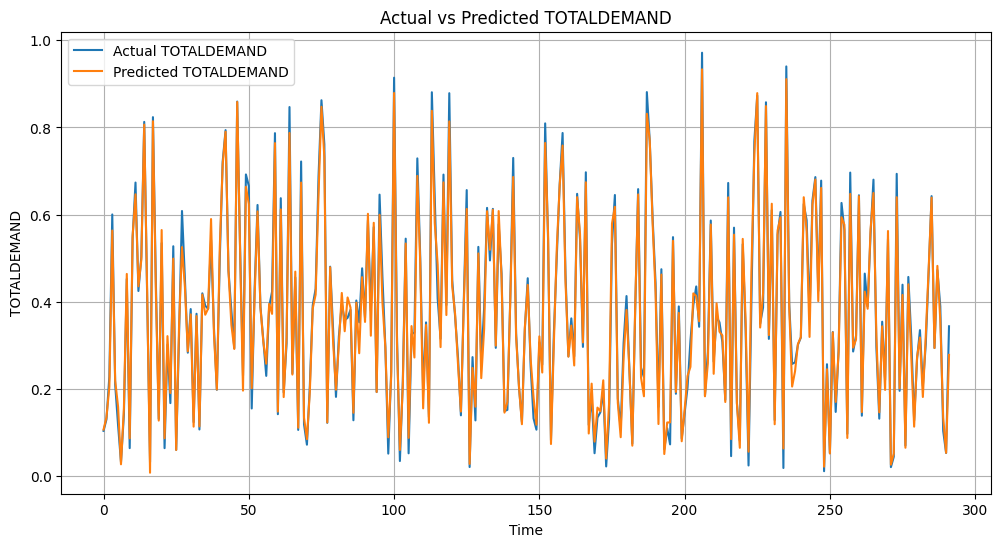

In [221]:
plt.figure(figsize=(12, 6))
plt.plot(y_val[:, 0], label='Actual TOTALDEMAND')
plt.plot(predictions[:, 0], label='Predicted TOTALDEMAND')
plt.xlabel('Time')
plt.ylabel('TOTALDEMAND')
plt.title('Actual vs Predicted TOTALDEMAND')
plt.legend()
plt.grid(True)
plt.show()



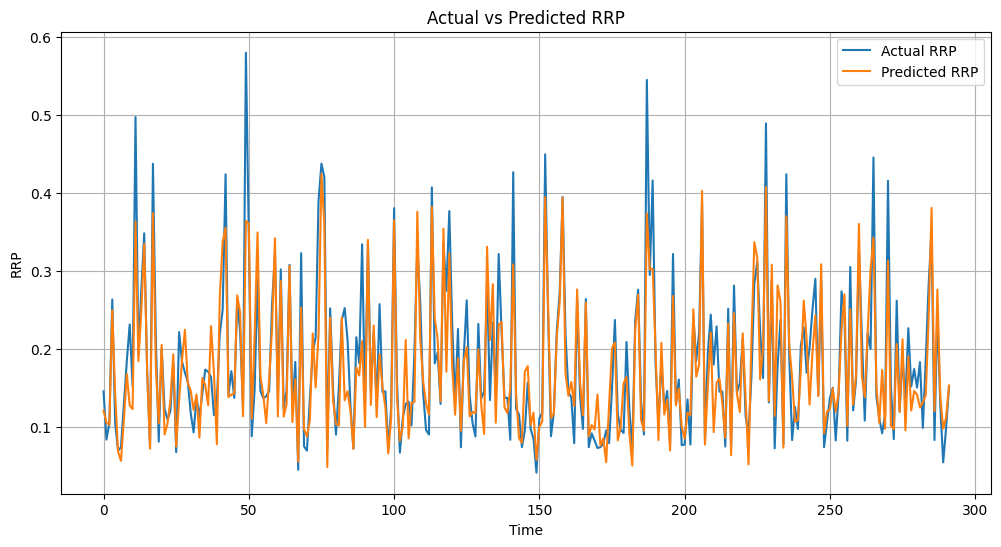

In [222]:
plt.figure(figsize=(12, 6))
plt.plot(y_val[:, 1], label='Actual RRP')
plt.plot(predictions[:, 1], label='Predicted RRP')
plt.xlabel('Time')
plt.ylabel('RRP')
plt.title('Actual vs Predicted RRP')
plt.legend()
plt.grid(True)
plt.show()

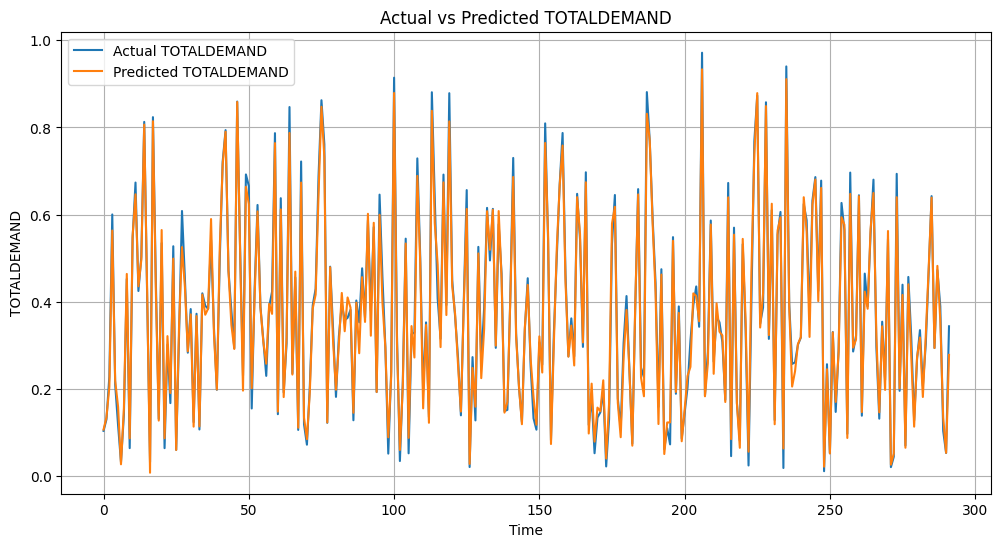

In [223]:
plt.figure(figsize=(12, 6))
plt.plot(y_val[:, 0], label='Actual TOTALDEMAND')
plt.plot(predictions[:, 0], label='Predicted TOTALDEMAND')
plt.xlabel('Time')
plt.ylabel('TOTALDEMAND')
plt.title('Actual vs Predicted TOTALDEMAND')
plt.legend()
plt.grid(True)
plt.show()



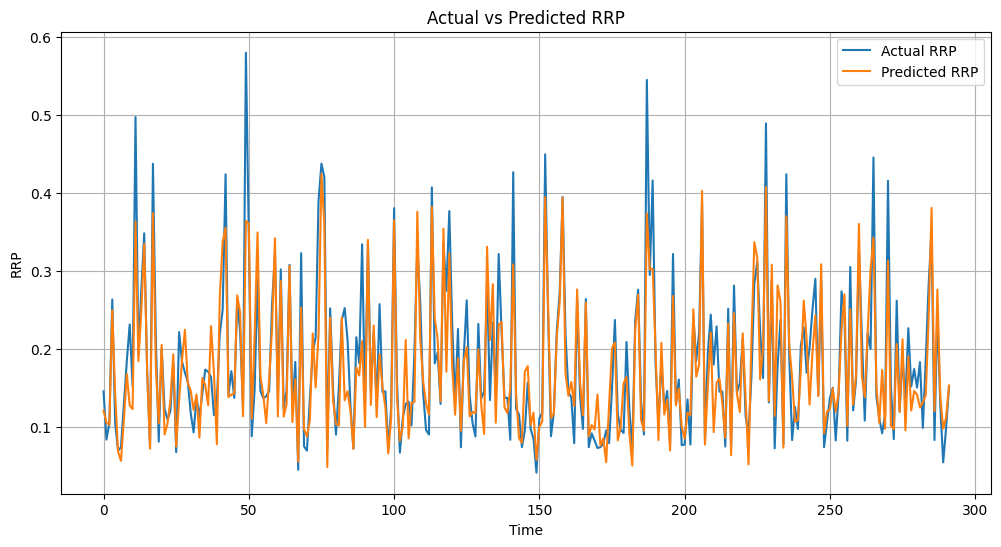

In [224]:
plt.figure(figsize=(12, 6))
plt.plot(y_val[:, 1], label='Actual RRP')
plt.plot(predictions[:, 1], label='Predicted RRP')
plt.xlabel('Time')
plt.ylabel('RRP')
plt.title('Actual vs Predicted RRP')
plt.legend()
plt.grid(True)
plt.show()

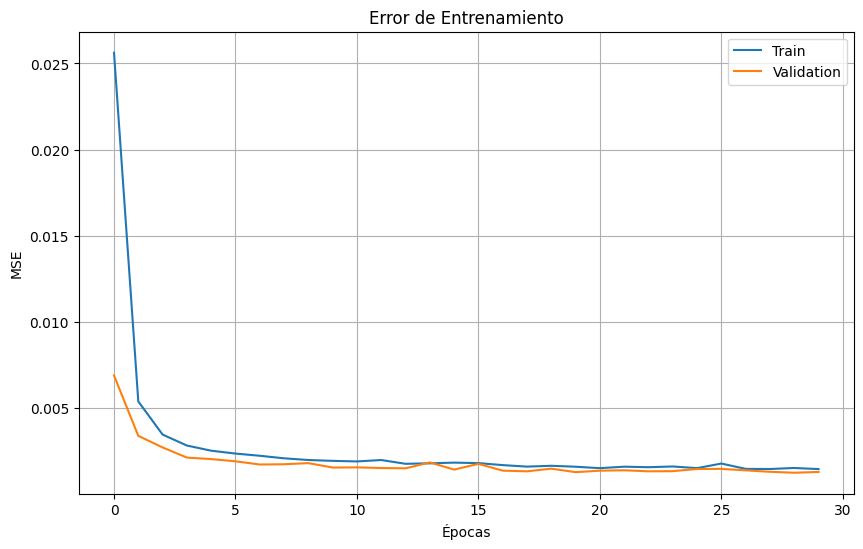

In [225]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Error de Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........